In [ ]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import seaborn as sb
df = pd.read_csv ('rockmusic_2147239.csv')
print (df)
data_top = df.head()
data_top

data_down = df.tail()
data_down






      index                                          name  \
0         0                       Smells Like Teen Spirit   
1         1                 Stairway to Heaven - Remaster   
2         2           Bohemian Rhapsody - Remastered 2011   
3         3                     Imagine - Remastered 2010   
4         4  (I Can't Get No) Satisfaction - Mono Version   
...     ...                                           ...   
5479   5479                              I'm In Your Mind   
5480   5480                                    Cellophane   
5481   5481                                     Hot Water   
5482   5482           Vitamin C - 2004 Remastered Version   
5483   5483                                             ~   

                                artist  release_date    length  popularity  \
0                              Nirvana          1991  5.032000          74   
1                         Led Zeppelin          1971  8.047167          78   
2                                

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
5479,5479,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.296,0.776,0.801000,6,0.597,-5.630,0.0597,93.481,4,0.406
5480,5480,Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.432,0.887,0.916000,7,0.120,-6.175,0.1230,92.965,4,0.357
5481,5481,Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.627,0.609,0.890000,9,0.116,-9.387,0.0332,86.861,4,0.734
5482,5482,Vitamin C - 2004 Remastered Version,CAN,1972,3.567767,52,0.643,0.006690,0.643,0.644,0.673000,4,0.162,-12.615,0.0462,117.225,4,0.853
5483,5483,~,Touché Amoré,2011,1.485100,0,0.222,0.000258,0.222,0.959,0.000275,6,0.154,-5.134,0.2080,161.693,4,0.128


In [ ]:
df.head()

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.547,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.723,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931


In [ ]:
df.describe()


,index,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
count,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000
mean,2741.500000,1991.196389,4.148302,49.413202,0.511047,0.173019,0.511047,0.715642,0.076073,5.191284,0.202984,-8.007842,0.057867,125.317722,3.947119,0.556601
std,1583.238769,15.331628,1.496269,17.317263,0.147916,0.242596,0.147916,0.204980,0.196084,3.489761,0.176790,3.534529,0.047112,28.375444,0.290485,0.241503
min,0.000000,1956.000000,0.162533,0.000000,0.000000,0.000001,0.000000,0.003830,0.000000,0.000000,0.012000,-32.909000,0.000000,0.000000,0.000000,0.000000
25%,1370.750000,1978.000000,3.302100,40.000000,0.413000,0.003658,0.413000,0.584000,0.000003,2.000000,0.091400,-10.083750,0.032800,104.362500,4.000000,0.367000
50%,2741.500000,1993.000000,3.945442,52.000000,0.515000,0.048400,0.515000,0.758000,0.000273,5.000000,0.132000,-7.408500,0.042100,123.885000,4.000000,0.561000
75%,4112.250000,2004.000000,4.680271,62.000000,0.611000,0.260250,0.611000,0.885000,0.016800,9.000000,0.269250,-5.308000,0.062900,142.731250,4.000000,0.750250
max,5483.000000,2020.000000,24.091767,84.000000,0.987000,0.995000,0.987000,0.998000,0.993000,11.000000,0.999000,1.949000,0.550000,217.913000,5.000000,0.990000


In [ ]:
df.isnull().sum().sum() 
#checking null values throyghout the dataset

0

In [ ]:
df.dropna(inplace=True) 
#drop all the null values and make inplace as true permanently

In [ ]:
df.isnull().sum() 
#checking null values in each column

index               0
name                0
artist              0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
danceability.1      0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [ ]:
a=df.corr()
a
#The linear/pairwise relationship between two variables.


,index,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
index,1.000000,0.165672,-0.053774,-0.386874,-0.056993,-0.063588,-0.056993,0.068924,0.049552,0.022695,0.014186,0.037623,0.034534,0.022279,-0.013936,-0.039388
release_date,0.165672,1.000000,0.003281,-0.282614,-0.082780,-0.277685,-0.082780,0.285391,0.077449,0.030631,0.091113,0.382334,0.064358,0.027662,0.026903,-0.215245
length,-0.053774,0.003281,1.000000,0.000198,-0.134880,-0.081761,-0.134880,-0.063400,0.125650,0.014821,0.048147,-0.101349,-0.050859,-0.047545,0.010123,-0.246810
popularity,-0.386874,-0.282614,0.000198,1.000000,0.115690,0.047653,0.115690,-0.079499,-0.115815,0.032483,-0.135936,-0.008251,-0.055595,-0.030013,0.015511,0.030984
danceability,-0.056993,-0.082780,-0.134880,0.115690,1.000000,0.099566,1.000000,-0.134408,-0.098507,0.021297,-0.165255,-0.124727,-0.091101,-0.261845,0.110368,0.501211
acousticness,-0.063588,-0.277685,-0.081761,0.047653,0.099566,1.000000,0.099566,-0.594156,-0.016283,-0.039610,-0.032307,-0.452776,-0.072896,-0.138034,-0.107268,-0.009444
danceability.1,-0.056993,-0.082780,-0.134880,0.115690,1.000000,0.099566,1.000000,-0.134408,-0.098507,0.021297,-0.165255,-0.124727,-0.091101,-0.261845,0.110368,0.501211
energy,0.068924,0.285391,-0.063400,-0.079499,-0.134408,-0.594156,-0.134408,1.000000,0.003642,0.055879,0.162984,0.755346,0.256348,0.212975,0.130646,0.147017
instrumentalness,0.049552,0.077449,0.125650,-0.115815,-0.098507,-0.016283,-0.098507,0.003642,1.000000,0.023147,0.022628,-0.080946,-0.004325,-0.011328,-0.002908,-0.078813
key,0.022695,0.030631,0.014821,0.032483,0.021297,-0.039610,0.021297,0.055879,0.023147,1.000000,-0.011482,0.029353,0.038825,0.009674,0.010340,0.023342


In [ ]:
a.style.background_gradient(cmap='binary_r')
# Displaying dataframe as a heatmap 
# with diverging colourmap as coolwarm

,index,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
index,1.000000,0.165672,-0.053774,-0.386874,-0.056993,-0.063588,-0.056993,0.068924,0.049552,0.022695,0.014186,0.037623,0.034534,0.022279,-0.013936,-0.039388
release_date,0.165672,1.000000,0.003281,-0.282614,-0.082780,-0.277685,-0.082780,0.285391,0.077449,0.030631,0.091113,0.382334,0.064358,0.027662,0.026903,-0.215245
length,-0.053774,0.003281,1.000000,0.000198,-0.134880,-0.081761,-0.134880,-0.063400,0.125650,0.014821,0.048147,-0.101349,-0.050859,-0.047545,0.010123,-0.246810
popularity,-0.386874,-0.282614,0.000198,1.000000,0.115690,0.047653,0.115690,-0.079499,-0.115815,0.032483,-0.135936,-0.008251,-0.055595,-0.030013,0.015511,0.030984
danceability,-0.056993,-0.082780,-0.134880,0.115690,1.000000,0.099566,1.000000,-0.134408,-0.098507,0.021297,-0.165255,-0.124727,-0.091101,-0.261845,0.110368,0.501211
acousticness,-0.063588,-0.277685,-0.081761,0.047653,0.099566,1.000000,0.099566,-0.594156,-0.016283,-0.039610,-0.032307,-0.452776,-0.072896,-0.138034,-0.107268,-0.009444
danceability.1,-0.056993,-0.082780,-0.134880,0.115690,1.000000,0.099566,1.000000,-0.134408,-0.098507,0.021297,-0.165255,-0.124727,-0.091101,-0.261845,0.110368,0.501211
energy,0.068924,0.285391,-0.063400,-0.079499,-0.134408,-0.594156,-0.134408,1.000000,0.003642,0.055879,0.162984,0.755346,0.256348,0.212975,0.130646,0.147017
instrumentalness,0.049552,0.077449,0.125650,-0.115815,-0.098507,-0.016283,-0.098507,0.003642,1.000000,0.023147,0.022628,-0.080946,-0.004325,-0.011328,-0.002908,-0.078813
key,0.022695,0.030631,0.014821,0.032483,0.021297,-0.039610,0.021297,0.055879,0.023147,1.000000,-0.011482,0.029353,0.038825,0.009674,0.010340,0.023342


In [ ]:
df.drop(['valence'],axis=1)

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature
0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4
1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4
2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4
3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.547,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4
4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.723,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,5479,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.296,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4
5480,5480,Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.432,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4
5481,5481,Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.627,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4
5482,5482,Vitamin C - 2004 Remastered Version,CAN,1972,3.567767,52,0.643,0.006690,0.643,0.644,0.673000,4,0.1620,-12.615,0.0462,117.225,4


In [ ]:
df.head()

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.547,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.723,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931


In [ ]:
df

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.547,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.723,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,5479,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.296,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406
5480,5480,Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.432,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357
5481,5481,Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.627,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734
5482,5482,Vitamin C - 2004 Remastered Version,CAN,1972,3.567767,52,0.643,0.006690,0.643,0.644,0.673000,4,0.1620,-12.615,0.0462,117.225,4,0.853


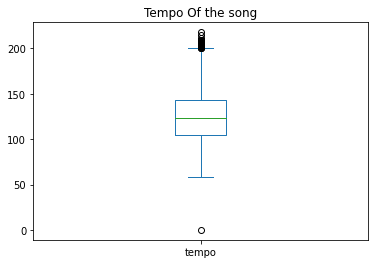

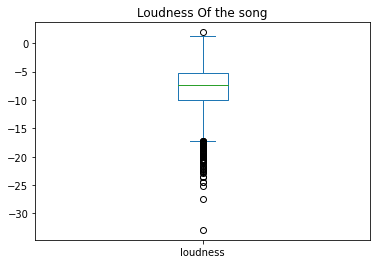

In [ ]:
df['tempo'].plot(kind='box', title='Tempo Of the song')
plt.show()
df['loudness'].plot(kind='box', title='Loudness Of the song')
plt.show()
#box #whiskers line-median val #outliers-dots #505 of data #interquartile range #mean dotted lines T-last point- dependent on the outlier #interquartile range


In [ ]:
newname = df.rename(columns = {'name': 'song_name', 'artist':'artist_name'} , inplace = False)

print(newname)
#renaming a function

      index                                     song_name  \
0         0                       Smells Like Teen Spirit   
1         1                 Stairway to Heaven - Remaster   
2         2           Bohemian Rhapsody - Remastered 2011   
3         3                     Imagine - Remastered 2010   
4         4  (I Can't Get No) Satisfaction - Mono Version   
...     ...                                           ...   
5479   5479                              I'm In Your Mind   
5480   5480                                    Cellophane   
5481   5481                                     Hot Water   
5482   5482           Vitamin C - 2004 Remastered Version   
5483   5483                                             ~   

                           artist_name  release_date    length  popularity  \
0                              Nirvana          1991  5.032000          74   
1                         Led Zeppelin          1971  8.047167          78   
2                                

In [ ]:
df.groupby(['name', 'artist'])
 
print(df.groupby(['name', 'artist']).groups)

{('"45"', 'The Gaslight Anthem'): [5329], ('"Get A Shot Of The Refrigerator"', 'Stereolab'): [2511], ('#1 Crush', 'Garbage'): [3588], ('(Amphetamine) Logic', 'Various Artists'): [2951], ('(Can't You) Trip Like I Do - 2009 Remastered Version', 'Filter'): [3174], ('(Don't Fear) The Reaper', 'Blue Öyster Cult'): [67], ('(Everything I Do) I Do It For You', 'Bryan Adams'): [712], ('(Get A) Grip [on Yourself] - 1996 Remaster', 'The Stranglers'): [4349], ('(I Can't Get No) Satisfaction - Mono Version', 'The Rolling Stones'): [4], ('(I Just) Died in Your Arms Tonight - as made famous by Cutting Crew', 'Various Artists'): [2162], ('(I Know) I'm Losing You', 'Rod Stewart'): [4257], ('(I Know) I'm Losing You - Single Version', 'Rare Earth'): [1793], ('(I'm Always Touched By Your) Presence Dear - Remastered', 'Blondie'): [2239], ('(I'm) Stranded', 'The Saints'): [3309], ('(If You're Wondering If I Want You To) I Want You To', 'Weezer'): [1089], ('(Just Like) Starting Over - Remastered 2010', 'John

In [ ]:
ch = df.head()
ch

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.547,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.723,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931


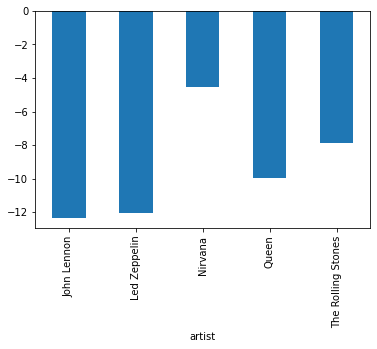

In [ ]:

bargr=ch['loudness'].groupby(df['artist']).mean().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79b6d00090>,
      dtype=object)

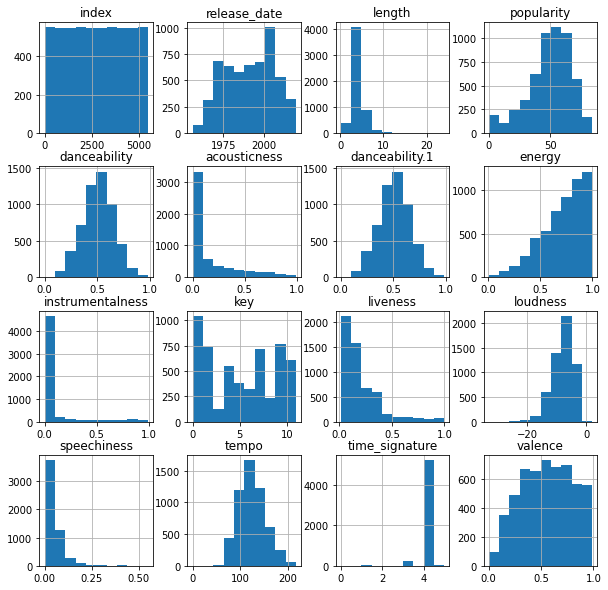

In [ ]:
df.hist(figsize=(10,10),bins=10)

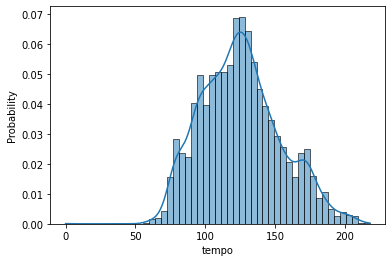

In [ ]:
num_var = df['tempo']
num_var = pd.Series(num_var, name = "tempo")
 
# Plot histogram
sns.histplot(data = num_var, kde = True,stat = "probability")

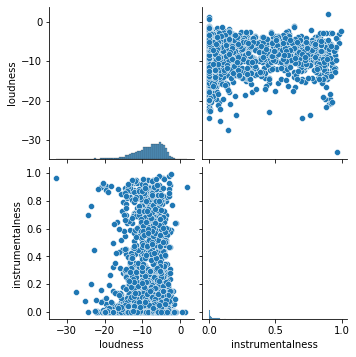

In [ ]:
import seaborn as sb #seaborn helps to analyse multiple features
col=['loudness','instrumentalness']
sb.pairplot(df[col])
#more than 2 independent features

#scatterplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


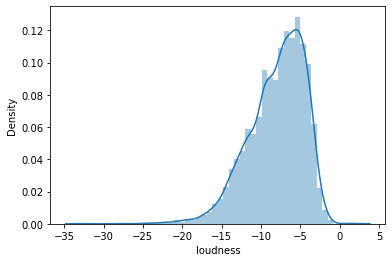

In [ ]:
 a = df['loudness']
 sns.distplot(a)
 plt.show()
 #check distribution of column


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f79d545ac20> (for post_execute):


KeyboardInterrupt: ignored

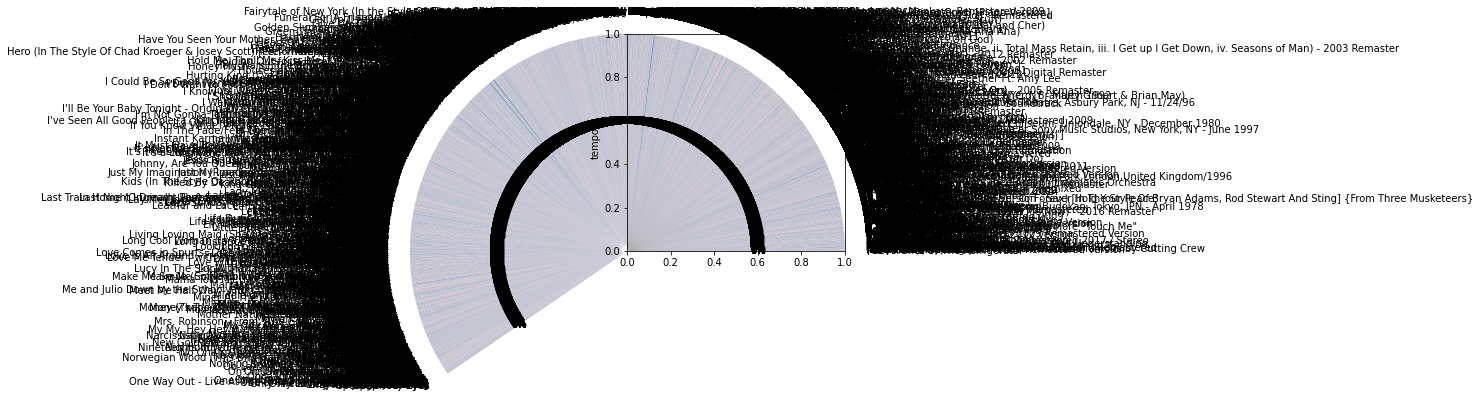

In [ ]:
colors = ['pink', 'silver', 'steelblue']
  

df.groupby(['name']).sum().plot(
    kind='pie', y='tempo', autopct='%1.0f%%',
  colors=colors )

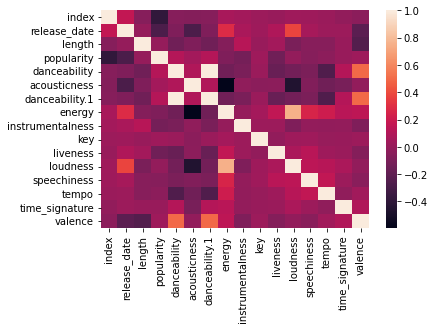

In [ ]:
import seaborn as sb
dataplot=sb.heatmap(df.corr())
plt.show()

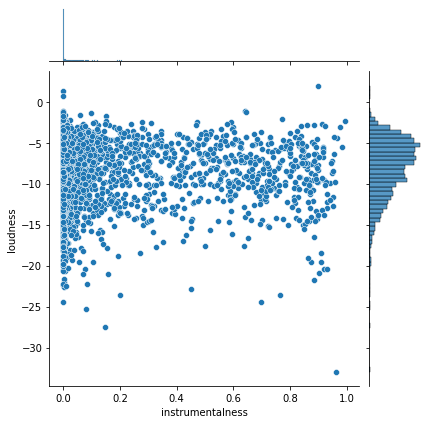

In [ ]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x = "instrumentalness", y = "loudness",kind = "scatter", data = df)
# show the plot
plt.show()

#relationship btw 2 numeric variables
#reg #hex

KeyboardInterrupt: ignored

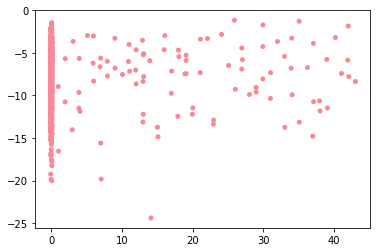

In [ ]:
sb.stripplot(x="instrumentalness", y="loudness", data=df)
  
plt.show()

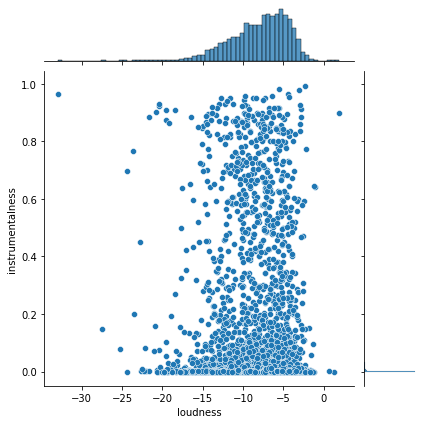

In [ ]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x = "loudness", y = "instrumentalness",kind = "scatter", data = df)
# show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
#Extracting Independent and dependent Variable  
x= df.iloc[:, [2,3]].values  
y= df.iloc[:, 4].values  
  
# Splitting the dataset into training and test set.  
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [ ]:
x

array([['Nirvana', 1991],
       ['Led Zeppelin', 1971],
       ['Queen', 1975],
       ...,
       ['King Gizzard & The Lizard Wizard', 2014],
       ['CAN', 1972],
       ['Touché Amoré', 2011]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#converting string into int using label encounter

cols = ['name','artist']


In [ ]:
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#label encoder

In [ ]:

df.info()
#info of data after conversion

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5484 entries, 0 to 5483
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5484 non-null   int64  
 1   name              5484 non-null   int64  
 2   artist            5484 non-null   int64  
 3   release_date      5484 non-null   int64  
 4   length            5484 non-null   float64
 5   popularity        5484 non-null   int64  
 6   danceability      5484 non-null   float64
 7   acousticness      5484 non-null   float64
 8   danceability.1    5484 non-null   float64
 9   energy            5484 non-null   float64
 10  instrumentalness  5484 non-null   float64
 11  key               5484 non-null   int64  
 12  liveness          5484 non-null   float64
 13  loudness          5484 non-null   float64
 14  speechiness       5484 non-null   float64
 15  tempo             5484 non-null   float64
 16  time_signature    5484 non-null   int64  


In [ ]:
df

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,3931,942,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1,4069,772,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,2,610,1045,1975,5.905333,74,0.392,0.288000,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,3,2201,704,1971,3.131100,77,0.547,0.907000,0.547,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,4,8,1516,1965,3.713550,77,0.723,0.038300,0.723,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,5479,2146,751,2014,3.559833,47,0.296,0.005910,0.296,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406
5480,5480,789,751,2014,3.179750,44,0.432,0.002130,0.432,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357
5481,5481,1932,751,2014,3.396450,40,0.627,0.860000,0.627,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734
5482,5482,4884,239,1972,3.567767,52,0.643,0.006690,0.643,0.644,0.673000,4,0.1620,-12.615,0.0462,117.225,4,0.853


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5484 entries, 0 to 5483
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5484 non-null   int64  
 1   name              5484 non-null   int64  
 2   artist            5484 non-null   int64  
 3   release_date      5484 non-null   int64  
 4   length            5484 non-null   float64
 5   popularity        5484 non-null   int64  
 6   danceability      5484 non-null   float64
 7   acousticness      5484 non-null   float64
 8   danceability.1    5484 non-null   float64
 9   energy            5484 non-null   float64
 10  instrumentalness  5484 non-null   float64
 11  key               5484 non-null   int64  
 12  liveness          5484 non-null   float64
 13  loudness          5484 non-null   float64
 14  speechiness       5484 non-null   float64
 15  tempo             5484 non-null   float64
 16  time_signature    5484 non-null   int64  


In [ ]:
#Extracting Independent and dependent Variable  
x= df.iloc[:, [2,5]]
y= df.iloc[:, 4] 
  
# Splitting the dataset into training and test set.  
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [ ]:
X_test

,artist,popularity
1540,1373,60
3488,35,48
348,1453,73
4264,126,51
15,819,71
...,...,...
1946,860,41
57,772,72
2464,436,42
2608,570,34


In [ ]:
X_train


,artist,popularity
246,574,77
3873,1461,38
2311,348,53
2337,1160,52
2447,447,62
...,...,...
4931,605,47
3264,632,42
1653,256,60
2607,1539,25


In [ ]:
Y_train


246     4.760883
3873    1.989550
2311    8.155550
2337    3.846667
2447    4.864667
          ...   
4931    3.639767
3264    3.373917
1653    3.073767
2607    3.719767
2732    6.054433
Name: length, Length: 4113, dtype: float64

In [ ]:
df.dtypes

index                 int64
name                  int64
artist                int64
release_date          int64
length              float64
popularity            int64
danceability        float64
acousticness        float64
danceability.1      float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5484 entries, 0 to 5483
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5484 non-null   int64  
 1   name              5484 non-null   int64  
 2   artist            5484 non-null   int64  
 3   release_date      5484 non-null   int64  
 4   length            5484 non-null   float64
 5   popularity        5484 non-null   int64  
 6   danceability      5484 non-null   float64
 7   acousticness      5484 non-null   float64
 8   danceability.1    5484 non-null   float64
 9   energy            5484 non-null   float64
 10  instrumentalness  5484 non-null   float64
 11  key               5484 non-null   int64  
 12  liveness          5484 non-null   float64
 13  loudness          5484 non-null   float64
 14  speechiness       5484 non-null   float64
 15  tempo             5484 non-null   float64
 16  time_signature    5484 non-null   int64  


In [ ]:
#Extracting Independent and dependent Variable  
x= df.iloc[:, [2,3]].values  
y= df.iloc[:, 2].values  
  
# Splitting the dataset into training and test set.  
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
 

In [ ]:
#p=1=Minkowski=Mannahattan p=2=Minkowski=Euchlidean p=3=Chebyshev
classifier= KNeighborsClassifier(n_neighbors=3,p=2) 
classifier.fit(X_train, Y_train)   
classifier2= KNeighborsClassifier(n_neighbors=3,p=1) 
classifier2.fit(X_train, Y_train)  

KNeighborsClassifier(n_neighbors=3, p=1)

In [ ]:
print("{}".format(classifier))
print("{}".format(classifier2))

KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier(n_neighbors=3, p=1)


In [ ]:
#Predicting the test set result  
Y_pred= classifier.predict(X_test) 
Y_pred2= classifier2.predict(X_test) 

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, Y_pred)  

In [ ]:
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
acc=accuracy_score(Y_test, Y_pred)
acc

0.5463165572574763

In [ ]:
cl=classification_report(Y_test, Y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
cl

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00         1\n           2       0.00      0.00      0.00         0\n           5       1.00      0.50      0.67         2\n           6       0.33      0.50      0.40         2\n           7       0.00      0.00      0.00         0\n           8       0.00      0.00      0.00         0\n           9       0.00      0.00      0.00         1\n          10       0.00      0.00      0.00         2\n          16       1.00      1.00      1.00         2\n          18       0.00      0.00      0.00         1\n          19       0.82      1.00      0.90         9\n          20       0.33      1.00      0.50         1\n          21       0.00      0.00      0.00         1\n          23       0.00      0.00      0.00         0\n          24       0.00      0.00      0.00         1\n          25       0.00      0.00      0.00         1\n          28       0.00      0.00      0.00         1\n       

In [ ]:
from matplotlib.colors import ListedColormap  
import numpy as nm  
import matplotlib.pyplot as mtp 
x_set, y_set = X_train, Y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  = 0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
    c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('loudness')  
mtp.ylabel('')  
mtp.legend() 
mtp.show() 

NameError: ignored

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings

 #IMPORTING NECESSARY LIBRARIES


In [ ]:
df.head()


In [ ]:
df.tail()


In [ ]:
df.shape
#viewing number of rows and columns


In [ ]:
df.isnull().sum()
#Data is clean and can continue to the Explorary Data Analysis stage

In [ ]:
#Univariate analysis Type (Target features).
sns.countplot(df['loudness'], color='red')

In [ ]:
#Extracting Independent and dependent Variable  
x= df.iloc[:, [4,5]]
y= df.iloc[:, 2] 
  
# Splitting the dataset into training and test set.  
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [ ]:
df.info()

In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  




In [ ]:
classifier.fit(X_train, Y_train)

In [ ]:
    # Predicting the Test set results  
Y_pred = classifier.predict(X_test)  

In [ ]:
    # Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(Y_test, Y_pred)  
cm

In [ ]:
# Visualising the Training set results  
import matplotlib.pyplot as mtp  
import numpy as nm  
from matplotlib.colors import ListedColormap  
x_set, y_set = X_train, Y_train
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
   mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (Training set)')  
mtp.xlabel('loudness')  
mtp.ylabel('')  
mtp.legend()  
mtp.show()  

K MEANS CLUSTERING

In [ ]:
df.head()


,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.547,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.723,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931


In [ ]:
df. columns

Index(['index', 'name', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'danceability.1', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
       'tempo', 'time_signature', 'valence'],
      dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of       index                                          name  \
0         0                       Smells Like Teen Spirit   
1         1                 Stairway to Heaven - Remaster   
2         2           Bohemian Rhapsody - Remastered 2011   
3         3                     Imagine - Remastered 2010   
4         4  (I Can't Get No) Satisfaction - Mono Version   
...     ...                                           ...   
5479   5479                              I'm In Your Mind   
5480   5480                                    Cellophane   
5481   5481                                     Hot Water   
5482   5482           Vitamin C - 2004 Remastered Version   
5483   5483                                             ~   

                                artist  release_date    length  popularity  \
0                              Nirvana          1991  5.032000          74   
1                         Led Zeppelin          1971  8.047167          78   
2

In [ ]:
x = df.iloc[:, [9,13]].values   #energy #loudness 

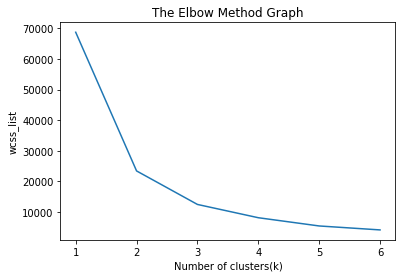

In [ ]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as mtp
wcss_list= []  #Initializing the list for the values of a.uynty
  
#Using for loop for iterations from 1 to 6.  
for i in range(1, 7):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)   # measures how well a dataset is clustered by k means
mtp.plot(range(1, 7), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 0)  
y_predict= kmeans.fit_predict(x) 

In [ ]:
y_predict

array([0, 1, 1, ..., 1, 1, 0], dtype=int32)

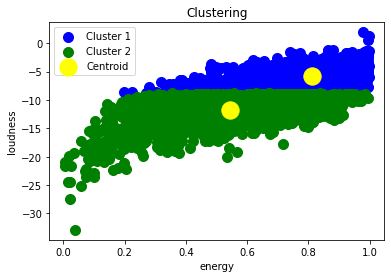

In [ ]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clustering')  
mtp.xlabel('energy')  
mtp.ylabel('loudness')  
mtp.legend()  
mtp.show() 

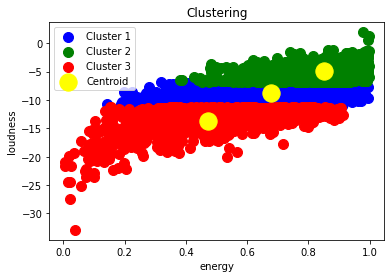

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 0)  
y_predict= kmeans.fit_predict(x)  
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clustering')  
mtp.xlabel('energy')  
mtp.ylabel('loudness')  
mtp.legend()  
mtp.show() 

In [ ]:
x= df.iloc[:,:-1].values #extracting independent variable

In [ ]:
y= df.iloc[:,3].values  #extracting depending variables

In [ ]:
df.head()

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.547,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.723,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931


In [ ]:
import pandas as pd
df2 = pd.read_csv ('/content/rockmusic_2147239.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484 entries, 0 to 5483
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5484 non-null   int64  
 1   name              5484 non-null   object 
 2   artist            5484 non-null   object 
 3   release_date      5484 non-null   int64  
 4   length            5484 non-null   float64
 5   popularity        5484 non-null   int64  
 6   danceability      5484 non-null   float64
 7   acousticness      5484 non-null   float64
 8   danceability.1    5484 non-null   float64
 9   energy            5484 non-null   float64
 10  instrumentalness  5484 non-null   float64
 11  key               5484 non-null   int64  
 12  liveness          5484 non-null   float64
 13  loudness          5484 non-null   float64
 14  speechiness       5484 non-null   float64
 15  tempo             5484 non-null   float64
 16  time_signature    5484 non-null   int64  


In [ ]:
df2.tail()

In [ ]:
df2.isnull().sum()

index               0
name                0
artist              0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
danceability.1      0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#converting string into int using label encounter

cols = ['name','artist']

In [ ]:
df2[cols] = df2[cols].apply(LabelEncoder().fit_transform)
#label encoder

In [ ]:
df2.info

<bound method DataFrame.info of       index  name  artist  release_date    length  popularity  danceability  \
0         0  3931     942          1991  5.032000          74         0.502   
1         1  4069     772          1971  8.047167          78         0.338   
2         2   610    1045          1975  5.905333          74         0.392   
3         3  2201     704          1971  3.131100          77         0.547   
4         4     8    1516          1965  3.713550          77         0.723   
...     ...   ...     ...           ...       ...         ...           ...   
5479   5479  2146     751          2014  3.559833          47         0.296   
5480   5480   789     751          2014  3.179750          44         0.432   
5481   5481  1932     751          2014  3.396450          40         0.627   
5482   5482  4884     239          1972  3.567767          52         0.643   
5483   5483  5315    1627          2011  1.485100           0         0.222   

      acousticness 

In [ ]:
#Extracting Independent and dependent Variable  
x= df2.iloc[:, [2,3]].values  
y= df2.iloc[:, 4].values 

In [ ]:
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0) 

In [ ]:
x_train

array([[1293, 2010],
       [1346, 1993],
       [1565, 2014],
       ...,
       [ 256, 1970],
       [1539, 2011],
       [ 907, 2001]])

In [ ]:
from sklearn.preprocessing import StandardScaler  

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484 entries, 0 to 5483
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5484 non-null   int64  
 1   name              5484 non-null   int64  
 2   artist            5484 non-null   int64  
 3   release_date      5484 non-null   int64  
 4   length            5484 non-null   float64
 5   popularity        5484 non-null   int64  
 6   danceability      5484 non-null   float64
 7   acousticness      5484 non-null   float64
 8   danceability.1    5484 non-null   float64
 9   energy            5484 non-null   float64
 10  instrumentalness  5484 non-null   float64
 11  key               5484 non-null   int64  
 12  liveness          5484 non-null   float64
 13  loudness          5484 non-null   float64
 14  speechiness       5484 non-null   float64
 15  tempo             5484 non-null   float64
 16  time_signature    5484 non-null   int64  


In [ ]:
df2.name = df2.name.astype('int64')

In [ ]:
#function which return return of min-max eq
def norm(item):
	return (item - item.min())/(item.max() - item.min())
#apply norm function to each item in dataframe
df2 = df2.apply(norm)
df2

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0.000000,0.739049,0.542314,0.546875,0.203494,0.880952,0.508612,0.000024,0.508612,0.913496,0.000174,0.090909,0.095238,0.813386,0.102545,0.535815,0.8,0.727273
1,0.000182,0.764993,0.444444,0.234375,0.329498,0.928571,0.342452,0.582914,0.342452,0.338141,0.003223,0.818182,0.105370,0.598428,0.061636,0.378284,0.8,0.198990
2,0.000365,0.114683,0.601612,0.296875,0.239991,0.880952,0.397163,0.289446,0.397163,0.400505,0.000000,0.000000,0.234043,0.658328,0.097455,0.660277,0.8,0.230303
3,0.000547,0.413800,0.405296,0.234375,0.124056,0.916667,0.554205,0.911558,0.554205,0.254655,0.184290,0.000000,0.082573,0.589563,0.045818,0.347625,0.8,0.170707
4,0.000730,0.001504,0.872769,0.140625,0.148397,0.916667,0.732523,0.038491,0.732523,0.864208,0.031923,0.181818,0.117528,0.717741,0.061455,0.625488,0.8,0.940404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,0.999270,0.403459,0.432355,0.906250,0.141973,0.559524,0.299899,0.005938,0.299899,0.776698,0.806647,0.545455,0.592705,0.782575,0.108545,0.428983,0.8,0.410101
5480,0.999453,0.148336,0.432355,0.906250,0.126089,0.523810,0.437690,0.002139,0.437690,0.888349,0.922457,0.636364,0.109422,0.766940,0.223636,0.426615,0.8,0.360606
5481,0.999635,0.363226,0.432355,0.906250,0.135145,0.476190,0.635258,0.864321,0.635258,0.608719,0.896274,0.818182,0.105370,0.674795,0.060364,0.398604,0.8,0.741414
5482,0.999818,0.918218,0.137594,0.250000,0.142304,0.619048,0.651469,0.006722,0.651469,0.643924,0.677744,0.363636,0.151976,0.582191,0.084000,0.537944,0.8,0.861616


In [ ]:
df2.to_csv(r"aleena_prepro.csv")

In [ ]:
#lab5 
import matplotlib.pyplot as plt 
import pandas as pd 

In [ ]:
data=pd.read_csv('rockmusic_2147239.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484 entries, 0 to 5483
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5484 non-null   int64  
 1   name              5484 non-null   object 
 2   artist            5484 non-null   object 
 3   release_date      5484 non-null   int64  
 4   length            5484 non-null   float64
 5   popularity        5484 non-null   int64  
 6   danceability      5484 non-null   float64
 7   acousticness      5484 non-null   float64
 8   danceability.1    5484 non-null   float64
 9   energy            5484 non-null   float64
 10  instrumentalness  5484 non-null   float64
 11  key               5484 non-null   int64  
 12  liveness          5484 non-null   float64
 13  loudness          5484 non-null   float64
 14  speechiness       5484 non-null   float64
 15  tempo             5484 non-null   float64
 16  time_signature    5484 non-null   int64  


In [ ]:
data.isnull().sum()

index               0
name                0
artist              0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
danceability.1      0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [ ]:
df_reduced = data.fillna(data.mean())
df_reduced

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.547,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.723,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,5479,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.296,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406
5480,5480,Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.432,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357
5481,5481,Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.627,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734
5482,5482,Vitamin C - 2004 Remastered Version,CAN,1972,3.567767,52,0.643,0.006690,0.643,0.644,0.673000,4,0.1620,-12.615,0.0462,117.225,4,0.853


In [ ]:
df_clean = df_reduced.fillna("Unknown")
df_clean

,index,name,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.502,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.338,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.392,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.547,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.723,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,5479,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.296,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406
5480,5480,Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.432,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357
5481,5481,Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.627,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734
5482,5482,Vitamin C - 2004 Remastered Version,CAN,1972,3.567767,52,0.643,0.006690,0.643,0.644,0.673000,4,0.1620,-12.615,0.0462,117.225,4,0.853


In [ ]:
df_clean.isnull().sum()

index               0
name                0
artist              0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
danceability.1      0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [ ]:
df_clean.columns

Index(['index', 'name', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'danceability.1', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
       'tempo', 'time_signature', 'valence'],
      dtype='object')

In [ ]:
df_imp=df_clean[['popularity','length']]

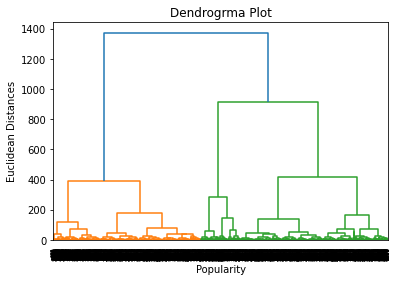

In [ ]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(df_imp, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Popularity")  
plt.show()  

In [ ]:
x = df_imp

In [ ]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  

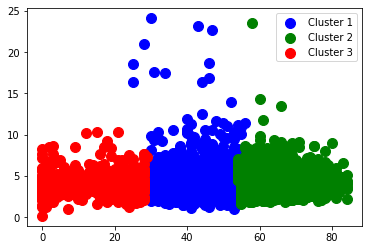

In [ ]:
#visulaizing the clusters  
import numpy as np
x = np.array(x)
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
#plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
#plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.legend()  
plt.show()  